In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report ,log_loss, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
def age_to_class(age):
    if age <= 20:
        return 0  # 0-20 years (Youth)
    elif age <= 40:
        return 1  # 21-40 years (Young Adult)
    elif age <= 60:
        return 2  # 41-60 years (Middle-Aged Adult)
    elif age <= 80:
        return 3  # 61-80 years (Senior Adult)
    else:
        return 4  # 81-116 years (Elderly)

target_size=(28, 28)
data = []
labels = []
dataset_path = "D:\Projects\machine learning\model\Dataset"

for file_name in os.listdir(dataset_path):
    age = int(file_name.split('_')[0])
    age_class = age_to_class(age)
    img_path = os.path.join(dataset_path, file_name)
    img = Image.open(img_path).resize(target_size).convert('RGB')
    img_array = np.array(img).flatten()

    data.append(img_array)
    labels.append(age_class)
        
x = np.array(data)
y = np.array(labels)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

### Normalization


In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (18081, 2352)
x_test shape:  (6027, 2352)


### reduce dimensionality

In [7]:
print(f"dimensions: {X_train.shape[1]}")  
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(f"Reduced dimensions: {X_train.shape[1]}")


dimensions: 2352
Reduced dimensions: 193


In [8]:
classifier = LogisticRegression(random_state=0, max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [9]:
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)

### Accuracy

In [10]:
accuracy_score(y_test, y_pred)

0.5468724074995852

### Confusion Matrix

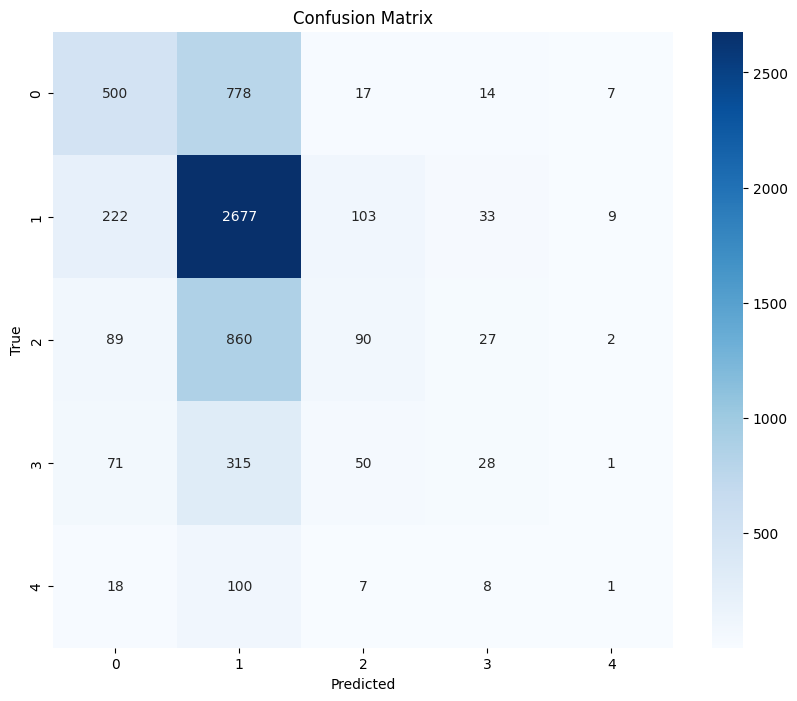

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Precision recall report

In [12]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.56      0.38      0.45      1316
           1       0.57      0.88      0.69      3044
           2       0.34      0.08      0.13      1068
           3       0.25      0.06      0.10       465
           4       0.05      0.01      0.01       134

    accuracy                           0.55      6027
   macro avg       0.35      0.28      0.28      6027
weighted avg       0.49      0.55      0.48      6027



### ROC and AUC graph

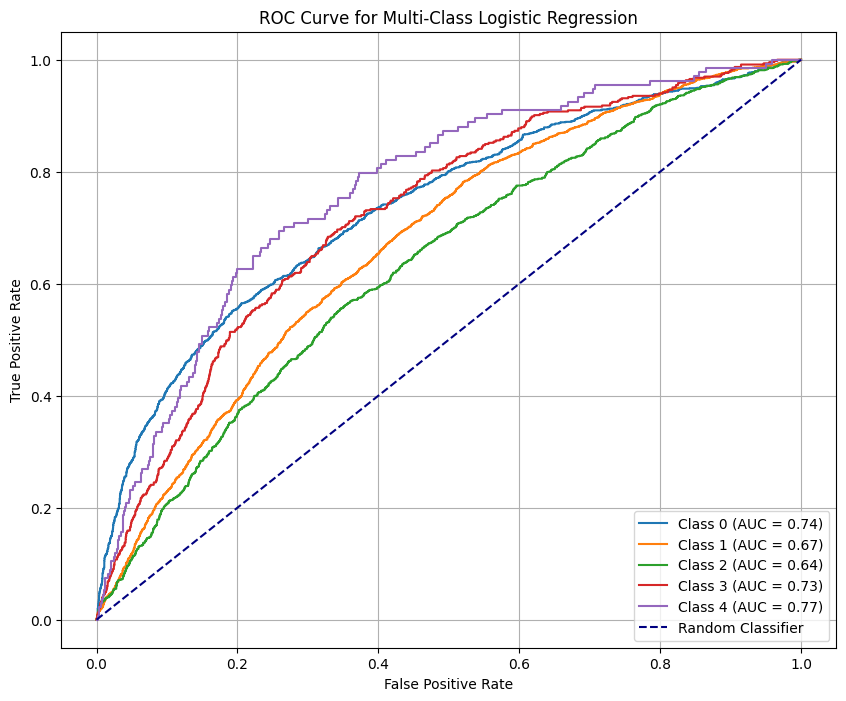

In [13]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4]) 
y_pred_proba = classifier.predict_proba(X_test)
plt.figure(figsize=(10, 8))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Log Loss

In [14]:
y_prob = classifier.predict_proba(X_test)
log_loss(y_test, y_prob)

1.153231177033976